# Initial Exploration of Golf Dataset
##### Purpose is to understand amount of missing data, required cleaning and basic distributions for each column.

### Loading Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [3]:
raw_file = pd.read_csv('../data/pga_2015-2022.csv')
raw_file

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Ancer,401353224,9261,288,289,60.0,51.1,56,3,7.6,...,12.0,2022,0,T32,0.20,-0.13,-0.08,0.86,0.65,0.85
1,A. Hadwin,401353224,5548,288,286,72.5,61.5,61,8,13.0,...,12.0,2022,0,T18,0.36,0.75,0.31,0.18,1.24,1.60
2,A. Lahiri,401353224,4989,144,147,21.5,17.4,27,0,0.0,...,12.0,2022,0,CUT,-0.56,0.74,-1.09,0.37,0.02,-0.54
3,A. Long,401353224,6015,144,151,20.5,13.6,17,0,0.4,...,12.0,2022,0,CUT,-1.46,-1.86,-0.02,0.80,-1.08,-2.54
4,A. Noren,401353224,3832,144,148,23.5,18.1,23,0,1.2,...,12.0,2022,0,CUT,0.53,-0.36,-1.39,0.19,-1.56,-1.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36859,V. Singh,2271,392,144,146,33.0,26.4,26,0,0.6,...,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36860,W. Kim,2271,7082,144,150,18.5,12.9,21,0,0.2,...,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36861,W. McGirt,2271,3532,216,215,44.5,40.6,45,0,6.2,...,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36862,Z. Blair,2271,9040,288,278,73.0,70.8,74,3,23.2,...,6.0,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 36,864 rows of data for 37 columns.

In [4]:
data_types = {}
for colname in raw_file.columns:
    col_dtype = raw_file[colname].dtype
    if col_dtype in data_types.keys():
        data_types[col_dtype].append(colname)
    else:
        data_types[raw_file[colname].dtype] = [colname]

for dtype in data_types.keys():
    print(dtype, data_types[dtype], len(data_types[dtype]), '\n')

object ['Player_initial_last', 'player', 'tournament name', 'course', 'date', 'Finish'] 6 

int64 ['tournament id', 'player id', 'hole_par', 'strokes', 'hole_SDP', 'streak_DKP', 'streak_SDP', 'n_rounds', 'made_cut', 'finish_DKP', 'finish_FDP', 'finish_SDP', 'total_SDP', 'season', 'no_cut'] 15 

float64 ['hole_DKP', 'hole_FDP', 'streak_FDP', 'pos', 'total_DKP', 'total_FDP', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'purse', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total'] 16 



The dataset contains 3 data types: O (string) (6 cols), int64 (15 cols) and float64 (16 cols)

Looking at the column names, there are 3 columns that spark intrigue: Unnamed: 2-4. Also, what happened to Unnamed: 1? It is likely that these columns are missing data.

Let's look at the missing values for each column.

In [5]:
for colname in raw_file.columns:
    num_null = raw_file[colname].isnull().sum()
    print(colname, ":", round(100*num_null/len(raw_file)), "%")

Player_initial_last : 0 %
tournament id : 0 %
player id : 0 %
hole_par : 0 %
strokes : 0 %
hole_DKP : 0 %
hole_FDP : 0 %
hole_SDP : 0 %
streak_DKP : 0 %
streak_FDP : 0 %
streak_SDP : 0 %
n_rounds : 0 %
made_cut : 0 %
pos : 42 %
finish_DKP : 0 %
finish_FDP : 0 %
finish_SDP : 0 %
total_DKP : 0 %
total_FDP : 0 %
total_SDP : 0 %
player : 0 %
Unnamed: 2 : 100 %
Unnamed: 3 : 100 %
Unnamed: 4 : 100 %
tournament name : 0 %
course : 0 %
date : 0 %
purse : 0 %
season : 0 %
no_cut : 0 %
Finish : 21 %
sg_putt : 21 %
sg_arg : 21 %
sg_app : 21 %
sg_ott : 21 %
sg_t2g : 21 %
sg_total : 21 %


As expected, Unnamed: 2-4 feature many null value. All of them.

We can also see that pos (position) is missing 42% of values. This makes sense as just less than half of players are cut from the final 2 rounds of a typical golf tournament. Similarly, it makes sense for the sg_ columns (shots gained) to be missing exactly half of this number (21%) as players who don't make cut still play half of the rounds in a tournament.

All other columns have 100% present values, which is nice. Hopefully there is little cleaning of data required.

### Cleaning the Data

First, we will check the unique values of the string columns. While not overly technical, I'm going to use my domain expertise (35 handicap) in combination with a quick manual check to detect any issues with these columns of data.

In [6]:
for colname in data_types[list(data_types.keys())[0]]:
    unique_vals = raw_file[colname].unique()
    # print(len(unique_vals), unique_vals) #Uncomment this line to see results

There appears to be multiple values (WD, W/D) to indicate a player has withdrawn from the tournament in the 'Finish' column. Let's make these both WD. There also is a value 'CUT', which like the missing values, represents a player not making the final two rounds of the tournament. Let's replace all missing values in this column with 'CUT', to make the data a little nicer.

In [7]:
clean_file = raw_file.replace({'Finish': 'W/D'}, 'WD')
clean_file = clean_file.replace({'Finish': np.NaN}, 'CUT')
len(clean_file.Finish.unique())

174

As we can see, there are now two less unique values in the Finish column than before.

Now, lets observe the integer columns.

<Axes: xlabel='strokes', ylabel='n_rounds'>

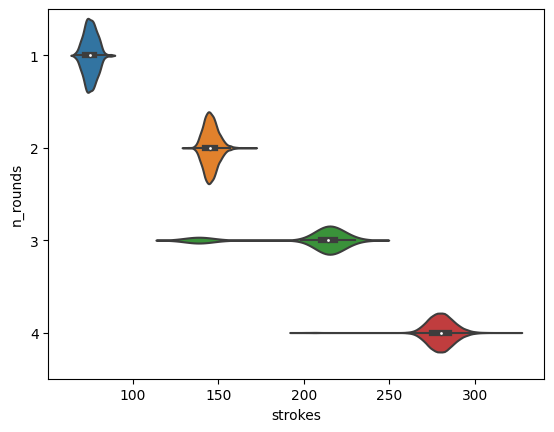

In [10]:
sns.violinplot(x='strokes', y='n_rounds', data=clean_file, orient='h')

<Axes: xlabel='strokes', ylabel='date'>

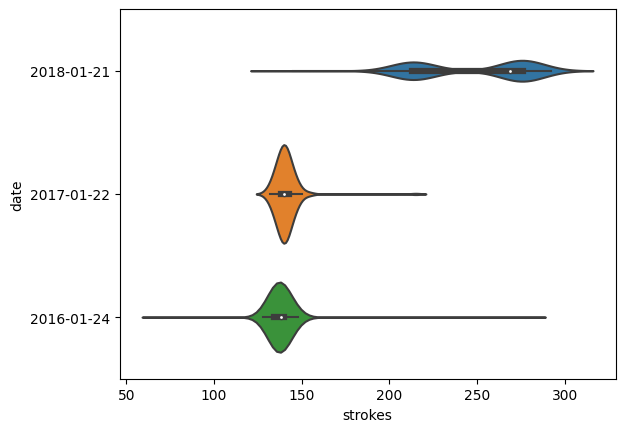

In [31]:
a1 = clean_file[clean_file['tournament name'] == 'CareerBuilder Challenge']
sns.violinplot(data=a1, x='strokes', y='date', orient='h')